In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import joblib
from matplotlib.colors import ListedColormap

plt.style.use("fivethirtyeight")

In [47]:
class Perceptron():
    def __init__(self, eta:float=None, epochs:int=None):
        self.weights = np.random.randn(3) * 1e-4
        training = (eta is not None) and (epochs is not None)
        if training:
            print(f"initial weigths before training: \n{self.weights}")
            self.eta = eta
            self.epochs = epochs
    
    def activation_function(self,z):
        return np.where(z > 0, 1, 0)
    def _z_outcome(self, inputs, weights):
        return np.dot(inputs,weights)
    
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        
        X_with_bias = np.c_[self.X, -np.ones((len(self.X),1))]
        print(f"X with bias: \n {X_with_bias}")
        
        for epoch in range(self.epochs):
            print("--"*10)
            print(f"for epoch >> {epoch+1}")
            print("--"*10)
            
            z = self._z_outcome(X_with_bias, self.weights)
            y_hat = self.activation_function(z)
            print(f"Predicted value after forward pass: \n{y_hat} ")
            
            self.error = self.y - y_hat
            print(f"error: \n{self.error}")
            
            self.weights = self.weights + self.eta*np.dot(X_with_bias.T, self.error)
            print(f"Updated weigths after epoch: {epoch+1}/{self.epochs}: \n{self.weights}")
            print("##"*10)
        
    def predict(self, X):
        X_with_bias = np.c_[X, -np.ones((len(X), 1))]
        z = self._z_outcome(X_with_bias, self.weights)
        return self.activation_function(z)
             
    def total_loss(self):
        total_loss = np.sum(self.error)
        print(f"\n total loss:{total_loss}\n")
        return total_loss
    
    def _create_dir_return_path(self,model_dir, filename):
        os.makedirs(model_dir, exist_ok=True)
        return os.path.join(model_dir,filename)
        
    
    def load(self,filepath):
        return joblib.load(filepath)
             
        
    def save(self,filename,model_dir=None):
        if model_dir is not None:
            model_file_path = self._create_dir_return_path(model_dir, filename)
            joblib.dump(self, model_file_path)
        else:
            model_file_path = self._create_dir_return_path("model",filename)
            joblib.dump(self,model_file_path)
        
        

In [21]:
def prepare_data(df,target_col="y"):
    X = df.drop(target_col,axis=1)
    y = df[target_col]
    return X, y

In [73]:
AND = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y" : [0,0,0,1]
}

df_AND = pd.DataFrame(AND)
df_AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [75]:
X, y = prepare_data(df_AND)

ETA = 0.1
EPOCHS = 10

model_and = Perceptron(eta=ETA,epochs=EPOCHS)
model_and.fit(X,y)
_ = model_and.total_loss()

initial weigths before training: 
[-1.08567026e-04 -6.96784855e-05 -1.00041286e-05]
X with bias: 
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 1
--------------------
Predicted value after forward pass: 
[1 0 0 0] 
error: 
0   -1
1    0
2    0
3    1
Name: y, dtype: int64
Updated weigths after epoch: 1/10: 
[ 9.98914330e-02  9.99303215e-02 -1.00041286e-05]
####################
--------------------
for epoch >> 2
--------------------
Predicted value after forward pass: 
[1 1 1 1] 
error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
Updated weigths after epoch: 2/10: 
[-1.08567026e-04 -6.96784855e-05  2.99989996e-01]
####################
--------------------
for epoch >> 3
--------------------
Predicted value after forward pass: 
[0 0 0 0] 
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
Updated weigths after epoch: 3/10: 
[0.09989143 0.09993032 0.19999   ]
####################
--------------------
for epoch >> 4
---------

In [40]:
model_and.save(filename="and.model")

In [48]:
reload_model_and = Perceptron().load(filepath="model/and.model")

In [49]:
reload_model_and.predict(X=[[0,1]])

array([0])

In [32]:
OR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y" : [0,1,1,1]
}

df_OR = pd.DataFrame(OR)
df_OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [54]:
X, y = prepare_data(df_OR)

ETA = 0.1
EPOCHS = 10

model_or = Perceptron(eta=ETA,epochs=EPOCHS)
model_or.fit(X,y)
_ = model_or.total_loss()

initial weigths before training: 
[-2.72563327e-04 -2.69036933e-05  1.82590726e-05]
X with bias: 
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 1
--------------------
Predicted value after forward pass: 
[0 0 0 0] 
error: 
0    0
1    1
2    1
3    1
Name: y, dtype: int64
Updated weigths after epoch: 1/10: 
[ 0.19972744  0.1999731  -0.29998174]
####################
--------------------
for epoch >> 2
--------------------
Predicted value after forward pass: 
[1 1 1 1] 
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
Updated weigths after epoch: 2/10: 
[ 0.19972744  0.1999731  -0.19998174]
####################
--------------------
for epoch >> 3
--------------------
Predicted value after forward pass: 
[1 1 1 1] 
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
Updated weigths after epoch: 3/10: 
[ 0.19972744  0.1999731  -0.09998174]
####################
--------------------
for epoch >> 4
--------------------
Predicted

In [55]:
model_or.save(filename="or.model",model_dir="model_or")

In [56]:
reload_model_or = Perceptron().load(filepath="model_or/or.model")

In [57]:
reload_model_or.predict(X=[[0,1]])

array([1])

In [78]:
XOR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y" : [0,1,1,0]
}

df_XOR = pd.DataFrame(XOR)
df_XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [79]:
X, y = prepare_data(df_XOR)

ETA = 0.1
EPOCHS = 10

model_xor = Perceptron(eta=ETA,epochs=EPOCHS)
model_xor.fit(X,y)
_ = model_xor.total_loss()

initial weigths before training: 
[-1.55503905e-05 -7.55410311e-05  6.54251040e-05]
X with bias: 
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 1
--------------------
Predicted value after forward pass: 
[0 0 0 0] 
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
Updated weigths after epoch: 1/10: 
[ 0.09998445  0.09992446 -0.19993457]
####################
--------------------
for epoch >> 2
--------------------
Predicted value after forward pass: 
[1 1 1 1] 
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
Updated weigths after epoch: 2/10: 
[-1.55503905e-05 -7.55410311e-05  6.54251040e-05]
####################
--------------------
for epoch >> 3
--------------------
Predicted value after forward pass: 
[0 0 0 0] 
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
Updated weigths after epoch: 3/10: 
[ 0.09998445  0.09992446 -0.19993457]
####################
--------------------
for epoch >> 4
------------------

In [68]:
""""def save_plot(df,model,filename="plot.png",plot_dir="plots"):
    
    def _create_base_plot(df):
        df.plot(kind='scatter', x='x1',y='x2', c='y',s=100, cmap = 'coolwarm')
        plt.axhline(y=0, color='black',linestyle="--",linewidth=1)
        plt.axvline(x=0, color='black',linestyle="--",linewidth=1)
        
        figure = plt.gcf()
        figure.set_size_inches(10,8)
        
    def _plot_decision_regions(X,y,classifier,resolution=0.02):
        colors = ("cyan","lightgreen")
        cmap = ListedColormap(colors)
        
        X = X.values
        x1 = X[:,0]
        x2 = X[:,1]
        
        x1_min, x1_max = x1.min()-1, x1.max()+1
        x2_min, x2_max = x2.min()-1, x2.max()+1
        
        xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                             np.arange(x2_min,x2_max,resolution))
        
        y_hat = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)
        
        plt.contour(xx1,xx2,y_hat,alpha=0.3,cmap=cmap)
        plt.xlim(xx1.min(),xx1.max())
        plt.ylim(xx2.min(),xx2.max())
        
        plt.plot()
    
    X, y = prepare_data(df)
    
    _create_base_plot(df)
    _plot_decision_regions(X, y, model)
    
    os.makedirs(plot_dir,exist_ok=True)
    plot_path = os.path.join(plot_dir,filename)
    plt.savefig(plot_path)""""

SyntaxError: EOL while scanning string literal (3088459890.py, line 41)

In [69]:
def save_plot(df, model, filename="plot.png", plot_dir="plots"):
    def _create_base_plot(df):
        df.plot(kind="scatter", x="x1", y="x2", c="y", s=100, cmap="coolwarm")
        plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
        plt.axvline(x=0, color="black", linestyle="--", linewidth=1)
        
        figure = plt.gcf()
        figure.set_size_inches(10, 8)
    
    def _plot_decision_regions(X, y, classifier, resolution=0.02):
        colors = ("cyan", "lightgreen")
        cmap = ListedColormap(colors)
        
        X = X.values # as an array
        x1 = X[:, 0]
        x2 = X[:, 1]
        
        x1_min, x1_max = x1.min() - 1, x1.max() + 1 
        x2_min, x2_max = x2.min() - 1, x2.max() + 1
        
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                               np.arange(x2_min, x2_max, resolution)
                              )
        y_hat = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)
        
        plt.contourf(xx1, xx2, y_hat, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        
        plt.plot()
        
    X, y = prepare_data(df)
    
    _create_base_plot(df)
    _plot_decision_regions(X, y, model)
    
    os.makedirs(plot_dir, exist_ok=True)
    plot_path = os.path.join(plot_dir, filename)
    plt.savefig(plot_path)

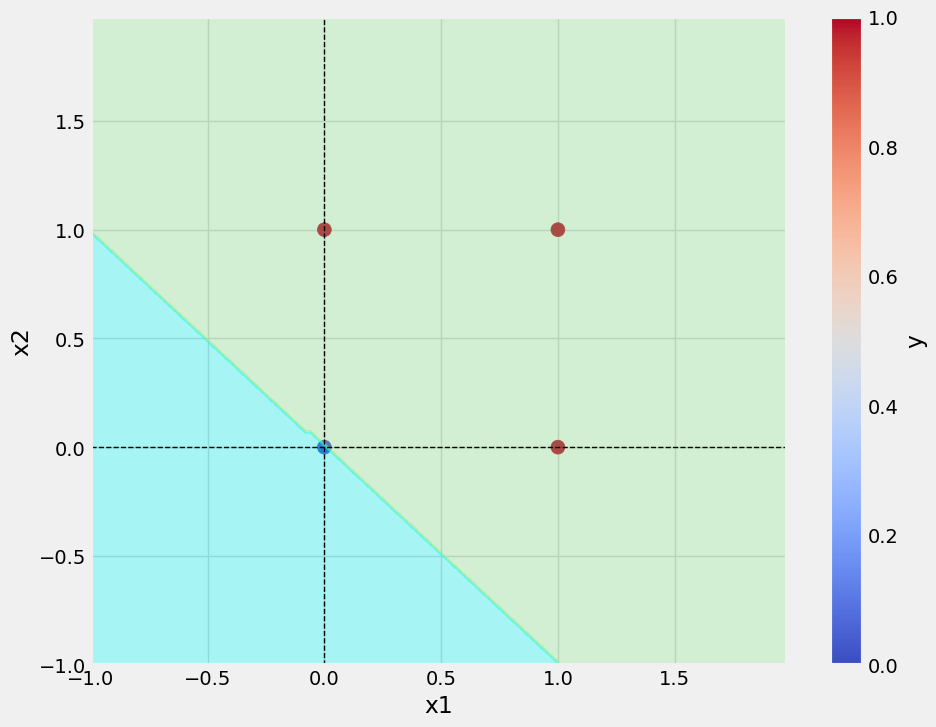

In [70]:
save_plot(df_OR,model_or,filename="or.png")

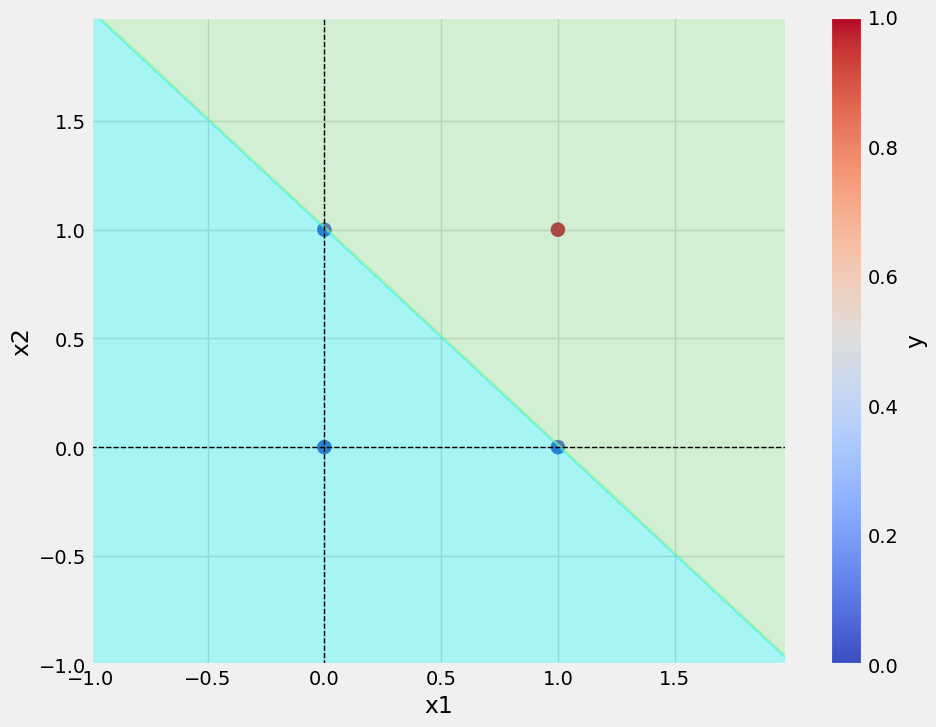

In [76]:
save_plot(df_AND,model_and,filename="and.png")

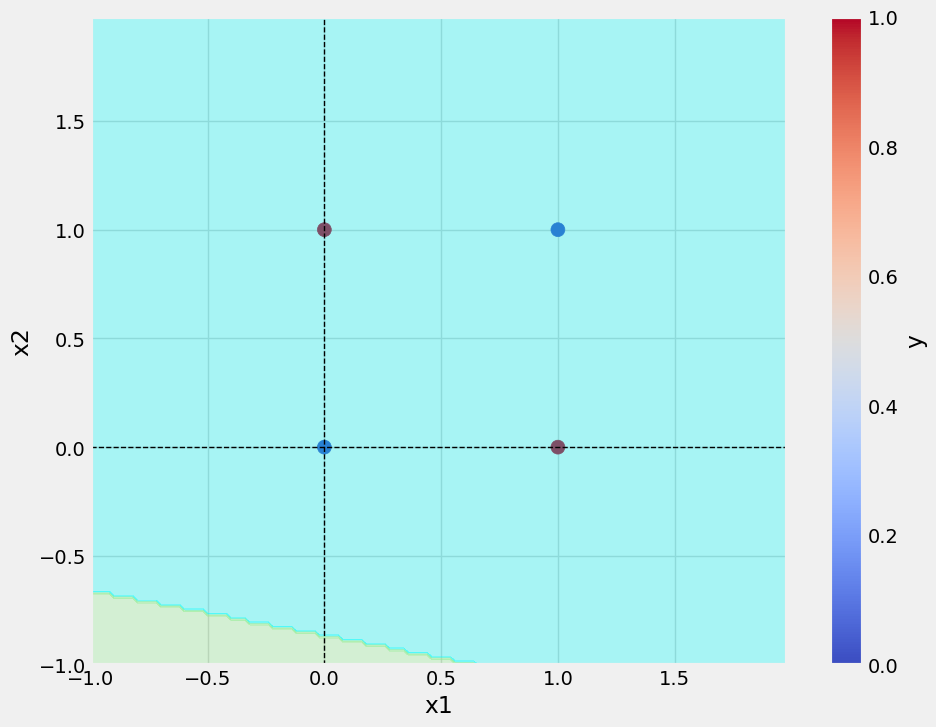

In [80]:
save_plot(df_XOR,model_xor,filename="xor.png")